In [1]:
# import matplotlib
import matplotlib.pyplot as plt

#import random
import random
import numpy as np
import pandas as pd
# set random seed
random.seed(5)

In [2]:
def plot_time_series(time, values, label):
    plt.figure(figsize=(10,6))
    plt.plot(time, values)
    plt.xlabel("Time", fontsize=20)
    plt.ylabel("Value", fontsize=20)
    plt.title(label, fontsize=20)
    plt.grid(True)

* generate NON stationary time-series

In [3]:
y1 = []
for i in range(50):
    y1.append(i**2 + np.random.randint(1,1000))

In [42]:
big_event = np.zeros(250)
big_event[125:175] = np.arange(50)*25
big_event[-50:] = np.arange(50)*-75
non_stationary = seasonal_upward + big_event
time_seasonal = np.arange(250)

* plot NON stationary series generated above

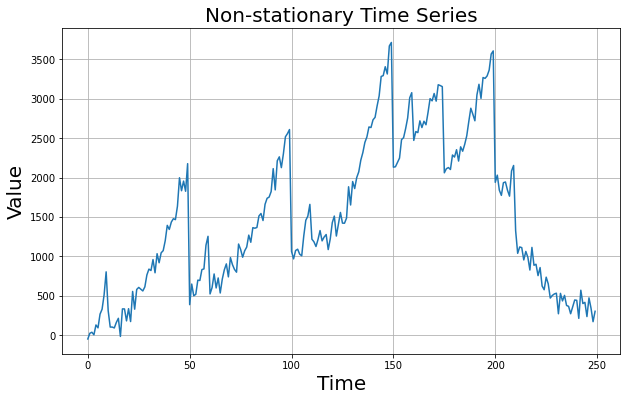

In [43]:
plot_time_series(time_seasonal, non_stationary, label="Non-stationary Time Series")

* generate stationary time-series

In [44]:
#np.random.rand(1000)

In [45]:
# Just a random pattern
time = np.arange(50) # Return evenly spaced values within a given interval [0,1,2,]
values = np.where(time < 10, time**3, (time-9)**2)# Repeat the pattern 5 times
seasonal = []
for i in range(5):
    for j in range(50):
        seasonal.append(values[j])# Plot
time_seasonal = np.arange(250)
#plot_time_series(time_seasonal, seasonal, label="Seasonality")

* plot stationary series generated above

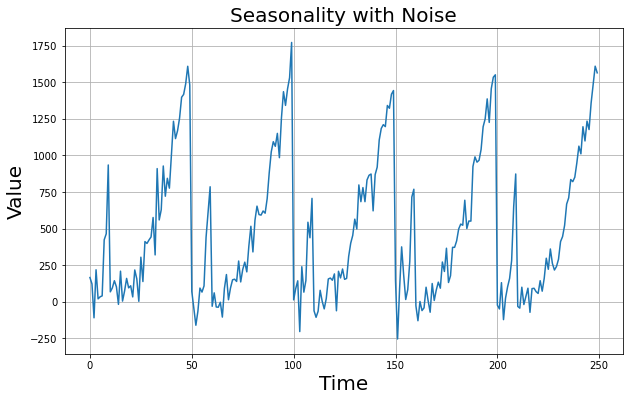

In [46]:
noise = np.random.randn(250)*100
seasonal += noise
time_seasonal = np.arange(250)
plot_time_series(time_seasonal, seasonal, label="Seasonality with Noise")

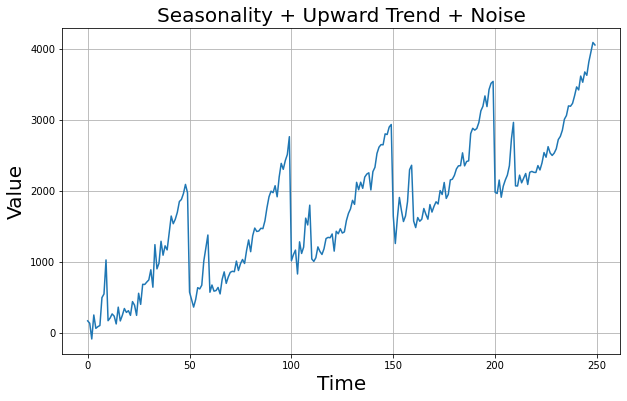

In [47]:
seasonal_upward = seasonal + np.arange(250)*10
time_seasonal = np.arange(250)
plot_time_series(time_seasonal, seasonal_upward, label="Seasonality + Upward Trend + Noise")

* Create function 'ADF_Stationarity_Test' with input parameters `timeseries` and `significance_level` which: 
    * prints adfuller test results
    * prints the conclusion stating whether timeseries is stationary based on the siginificance level (input parameter of function)


In [48]:
from statsmodels.tsa.stattools import adfuller
def ADF_Stationarity_Test(timeseries,significance_level=0.05):
    if isinstance(seasonal_upward,np.ndarray):
        result = adfuller(timeseries)
    else:
        result = adfuller(timeseries.values)
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[1] > significance_level :
        print(f'the data has a unit root and is non-stationary significance level:{significance_level}, p-value:{result[1]}')
    else:
        print(f'the data is stationary significance level:{significance_level}, p-value:{result[1]}')

* Apply function 'ADF_Stationarity_Test' to find out whether timeseries generated above are stationary.

In [49]:
ADF_Stationarity_Test(seasonal,.1) #time seasonal introduce a non stationary element

ADF Statistic: -3.642108
p-value: 0.005005
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
the data is stationary significance level:0.1, p-value:0.0050052007736515365


In [50]:
ADF_Stationarity_Test(non_stationary,.1)

ADF Statistic: -1.730456
p-value: 0.415493
Critical Values:
	1%: -3.458
	5%: -2.874
	10%: -2.573
the data has a unit root and is non-stationary significance level:0.1, p-value:0.4154928891861277


* Apply suitable transformation to make NON stationary time series stationary

## Seasonal Differencing

In seasonal differencing, instead of calculating the difference between consecutive values, we calculate the difference between an observation and a previous observation from the same season. For example, an observation taken on a Monday will be subtracted from an observation taken on the previous Monday. Mathematically it can be written as:


In [51]:
from scipy.ndimage.interpolation import shift
#pandas you can use.shift()
n=50
non_stationary_adjusted = non_stationary - shift(non_stationary, n, cval=np.NaN)

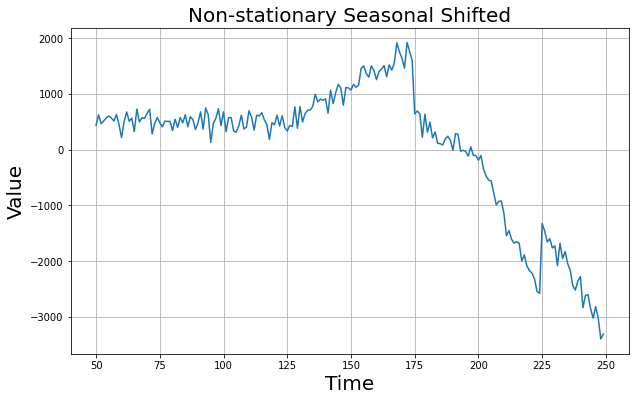

In [52]:
plot_time_series(time_seasonal, non_stationary_adjusted, label="Non-stationary Seasonal Shifted")

* plot transformed time series

In [53]:
non_stationary_adjusted_log = np.log(non_stationary) - shift(np.log(non_stationary), 1)

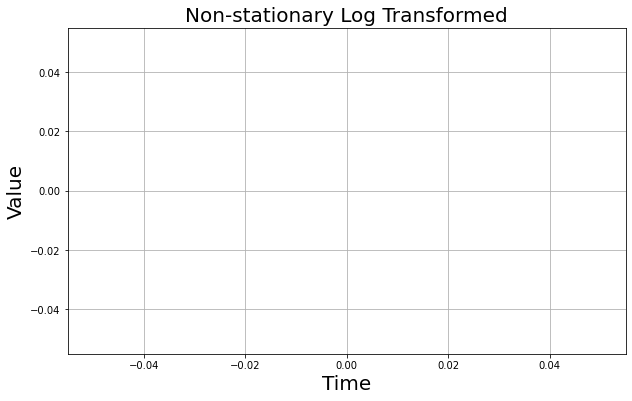

In [54]:
plot_time_series(time_seasonal, non_stationary_adjusted_log , label="Non-stationary Log Transformed")

* Apply function 'ADF_Stationarity_Test' to find out whether transformed timeseries is stationary.

In [58]:
non_stationary_adjusted = non_stationary_adjusted[~np.isnan(non_stationary_adjusted)]
ADF_Stationarity_Test(non_stationary_adjusted,.1)

ADF Statistic: 1.411446
p-value: 0.997166
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575
the data has a unit root and is non-stationary significance level:0.1, p-value:0.9971655219484189


In [ ]:
# log and then rolling works great
X = np.log(non_stationary)
X = X.rolling(10, center=False).sum().dropna()